<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Statistical_Time_Series_Analysis/03-auto-correlation-and-partial-auto-corellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Autocorrelation and Partial Autocorrelation

## Overview

Let's explore the concept of Autocorrelation and Partial Autocorrelation through a story. Imagine you have three different rivers flowing through different regions:

1. **White Noise River**: Its flow changes unpredictably from day to day with no discernible pattern (this is called “white noise”).  
2. **Random Walk River**: Its flow starts at some level, but each day it either goes up or down by a random amount—often resulting in a steady drift up or down over time.  
3. **Seasonal River**: Its flow meanders through a region with a clear seasonal cycle (e.g., rainy and dry seasons).

You want to understand how each river's flow **today** relates to its flow on previous days. Two tools can help:

- **Autocorrelation (ACF)** measures how a time series correlates with itself at different lags (e.g., day \(t\) vs. day \(t-1\), \(t-2\), etc.). 
- **Partial Autocorrelation (PACF)** refines this by stripping out the influence of intermediate lags to reveal the direct relationship between \(t\) and \(t-k\).

## Mathematical Explanation


Let's mathematically define these terms and use a simple example to illustrate:

- **Mathematical Definition of Autocorrelation** (ACF):
  The autocorrelation for a time series $ y_t $ at lag $ k $ is defined as:
  $$
  \text{ACF}(k) = \frac{\sum_{t=1}^{n-k} (y_t - \overline{y})(y_{t+k} - \overline{y})}{\sum_{t=1}^{n} (y_t - \overline{y})^2}
  $$
  where $\overline{y}$ is the mean of $y$.

- **Mathematical Definition of Partial Autocorrelation** (PACF):
  The partial autocorrelation at lag $ k $ is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

## Key Concepts in Plain Language

1. **White Noise**:  
   - A sequence of random numbers where each observation is independent of the past (no correlation).  
   - Typically has a constant mean and variance over time (this is **stationary**).  
   - Example: daily noise with mean 0 and standard deviation 1.

2. **Random Walk**:  
   - Each new value is the previous value **plus** some random shock.  
   - Tends to wander up or down over time, causing its mean and variance to change with time. This is **non-stationary**.  
   - Example: Stock prices often behave (roughly) like a random walk.

3. **Stationary vs. Non-Stationary**:  
   - A time series is **stationary** if its statistical properties (mean, variance, autocorrelation) do not change over time.  
   - A time series is **non-stationary** if it has a trend, changing variance, or other time-dependent behaviors.

4. **Seasonality**:  
   - A repeating pattern in a time series (e.g., daily temperature patterns or monthly sales cycles).  
   - Often identified by pronounced peaks in the ACF and/or PACF at the seasonal lag(s).

## Implementation

Below, we’ll generate three synthetic time series to illustrate these concepts:

1. **White Noise Data**
2. **Random Walk Data**
3. **Seasonal Data**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set a seed for reproducibility
np.random.seed(42)

# 1. White Noise (White Noise River)
# Mean 0, standard deviation 1, 100 data points
white_noise_data = np.random.randn(100)

# 2. Random Walk Data (Random Walk River)
# Start at 0 and keep adding random noise; 
# cumulatively sum random noise
random_walk_data = np.cumsum(np.random.randn(100))

# 3. Seasonal Data (Seasonal River)
# A perfect sine wave repeating over ~10-point cycles
seasonal_data = np.sin(np.linspace(0, 20*np.pi, 100))

### Plotting Function


We’ll create a small helper function to plot both ACF and PACF side by side for clarity.

In [4]:
def plot_acf_pacf(data, title):
    """
    Plots ACF and PACF for a given time series.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=20, ax=axes[0], title="ACF")
    sm.graphics.tsa.plot_pacf(data, lags=20, ax=axes[1], title="PACF")
    plt.suptitle(title, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

### 1. White Noise (White Noise River)

#### Intuition

- **White noise** is the purest form of randomness: no trend, no seasonality, and no memory of the past.
- It is **stationary** because the mean and variance do not depend on time.

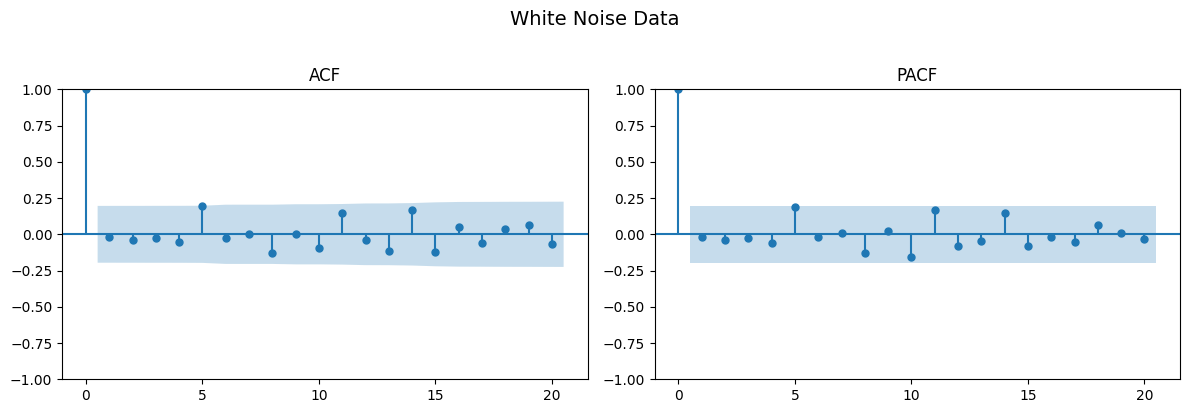

In [5]:
plot_acf_pacf(white_noise_data, title="White Noise Data")

#### Interpretation

- **ACF**: Almost all bars (except lag 0, which is always 1) hover near zero, confirming little to no correlation.  
- **PACF**: Also near zero for all lags beyond the first.  

Hence, **white noise** shows no pattern in its own history.

### 2. Random Walk (Random Walk River)

#### Intuition

- A **random walk** is formed by adding random shocks cumulatively.  
- Over time, it can drift up or down, creating a **non-stationary** series (its mean and variance change over time).  
- In practice, many real-world processes (e.g., stock prices) resemble random walks at a basic level.

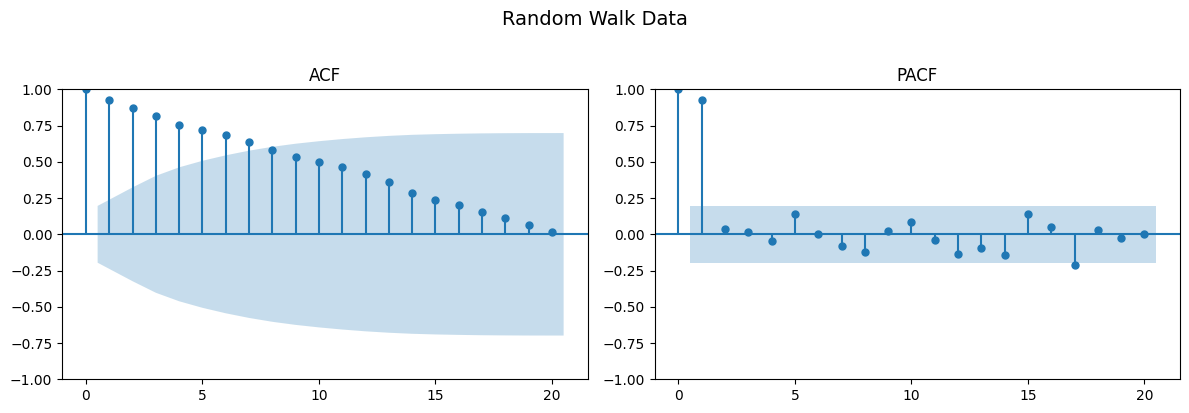

In [6]:
plot_acf_pacf(random_walk_data, title="Random Walk Data")

#### Interpretation

- **ACF**: Typically shows **strong correlation at many lags**, often decaying slowly rather than quickly dropping to zero. This is a hallmark of non-stationarity.  
- **PACF**: You’ll often see a **large spike at lag 1**, indicating that each point depends strongly on its immediate past, but subsequent lags may show diminishing but still notable correlation.

> **Note**: Since a random walk is non-stationary, the classic stationarity-based interpretations of the ACF/PACF are less straightforward. In traditional ARIMA modeling, you’d typically difference this series to make it stationary before analyzing.

### 3. Seasonal Data (Seasonal River)

#### Intuition

- A sine wave introduces a **regular repeating pattern**.  
- Expect peaks in the autocorrelation at multiples of the period (because the series “lines up” with itself after one full wave, two waves, etc.).

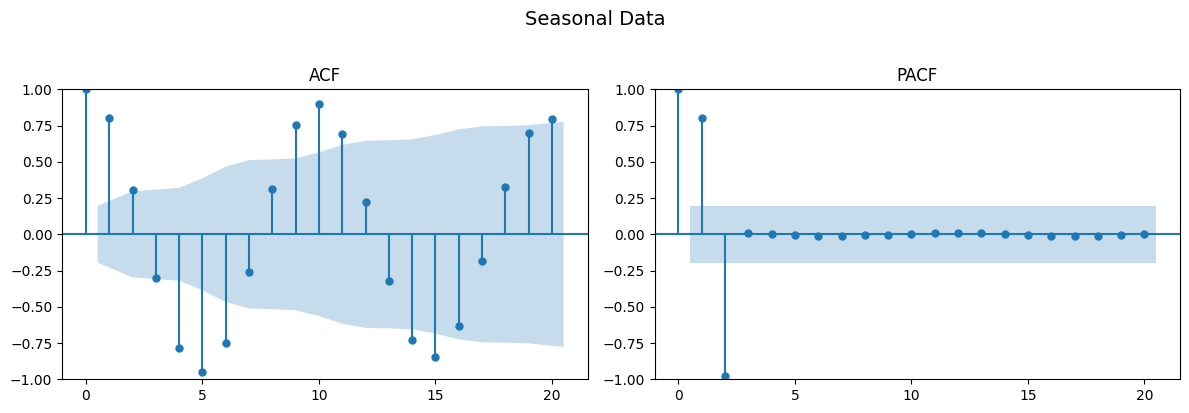

In [7]:
plot_acf_pacf(seasonal_data, title="Seasonal Data")

#### Interpretation

- **ACF**: Noticeable peaks at multiples of the period (in this case, around lag 10, 20, 30, etc.).  
- **PACF**: Shows significant correlation at some early lags, but many of the repeated patterns are already explained by shorter lags.

## Summary of Key Takeaways

1. **White Noise (Stationary)**  
   - No correlation between past and present.  
   - ACF and PACF both stay near zero for all lags beyond 0.

2. **Random Walk (Non-Stationary)**  
   - Strong correlation across many lags, reflecting the cumulative nature.  
   - The partial autocorrelation often shows a big spike at lag 1.  
   - You’d typically *difference* a random walk to handle its non-stationarity.

3. **Seasonal (Potentially Non-Stationary if Mean Shifts Over Seasons)**  
   - Clear cyclical patterns in both ACF and PACF at multiples of the seasonal period.  
   - If the amplitude or baseline changes over time, you might need additional transformations or seasonal differencing.

By examining both ACF and PACF, you can **diagnose** whether a time series is stationary, has strong trends (like a random walk), or has repeating seasonal patterns. These insights help guide model selection (e.g., AR, MA, ARIMA, SARIMA) for forecasting.

### Extra Note: Turning Non-Stationary Data into Stationary Data

- **Differencing**: Subtract each data point from the previous one (e.g., \(y_t - y_{t-1}\)). Applied to a random walk, differencing can remove the drift and yield a more stable (stationary) series for modeling.  
- **Decomposition**: If there’s strong seasonality, you might de-seasonalize or difference at the seasonal period.  